In [10]:
# Imports
import pandas as pd
import numpy as np
from IPython.display import display

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
import hdbscan

# Plot
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("./preproc_data/clean_text_all_subreddits_d2v.csv", low_memory=False)

# Print length
print(len(df.index))

# Check
df.head()

652146


,subreddit,date,author,id,clean_text,unique_clean_text,link_flair_text,num_comments,score,post_length,...,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63
0,ADHD,01/01/2019,DirtJunkie133,abd11x,recently diagnosed need talk others diagnosed ...,recently diagnosed need talk others well im ad...,NaN,13.0,1,3021,...,0.299332,0.510428,0.685804,-1.652678,0.128453,-0.037518,-0.252355,0.159227,0.765254,0.069043
1,ADHD,01/01/2019,Lin_the_pillow_artis,abd7q9,really annoyed family drunk friend family host...,really annoyed family drunk friend hosting new...,NaN,5.0,1,751,...,0.877196,-0.162841,-0.540606,-0.150722,0.928507,-0.031116,0.335095,-0.006605,-0.937683,-1.389813
2,ADHD,01/01/2019,Fleetfeathers,abda0t,medication journey current disappointment wan...,medication journey current disappointment want...,NaN,12.0,1,1713,...,0.574246,0.272370,1.032429,-1.337527,0.667623,0.400174,0.831625,0.345661,0.394120,-0.259718
3,ADHD,01/01/2019,UnleashedDebs,abdd13,wearable rem sleep detected gaming sleeping hy...,wearable rem sleep detected gaming sleeping hy...,NaN,4.0,1,988,...,1.307342,-1.477269,0.028247,-0.703448,0.413334,-0.083348,-0.643955,-0.406943,0.023596,-0.731947
4,ADHD,01/01/2019,liluglee,abdj4w,picking friend carpool nye party texted way dr...,picking friend carpool nye party texted way dr...,NaN,1.0,1,123,...,-0.321208,-0.081452,-0.145260,-0.533126,-0.085388,-0.120506,-0.483124,-0.229370,-0.199331,0.099358


# Clustering

In [3]:
# Drop label column
df_copy = df.drop(columns=["label"])

# Select only numeric columns
df_copy = df_copy.select_dtypes(['number'])

# Scale data
df_copy[df_copy.columns] = StandardScaler().fit_transform(df_copy)

# Drop all rows with NaN
df_copy = df_copy.dropna()

# Disply
display(df_copy.head())

,num_comments,score,post_length,word_count,norm_noun,norm_verb,norm_adj,norm_adv,compound_sent,like,...,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63
0,0.053725,-0.037219,1.872750,2.286707,-0.000385,0.386145,-0.302998,0.029174,1.273688,0.732369,...,0.515039,1.117292,0.749695,-2.491639,0.333914,-0.130851,-0.663914,0.531010,0.956422,-0.169411
1,-0.019409,-0.037219,-0.155580,-0.125836,0.754612,-0.960765,-0.645358,-0.129778,-1.282187,-0.090004,...,1.552497,-0.188002,-1.413258,0.036289,1.786693,-0.119035,0.462546,0.237102,-1.983925,-2.902682
2,0.044584,-0.037219,0.704003,1.029466,0.148139,-0.081685,0.122210,-0.308534,0.643440,0.326578,...,1.008601,0.655758,1.361018,-1.961210,1.312967,0.676921,1.414665,0.861431,0.315610,-0.785368
3,-0.028551,-0.037219,0.056189,0.112020,-0.197461,0.434426,0.135248,-0.203083,1.146846,-0.724359,...,2.324751,-2.736335,-0.410003,-0.893999,0.851215,-0.215431,-1.414824,-0.472427,-0.324150,-1.670123
4,-0.055976,-0.037219,-0.716721,-0.839405,1.525338,0.070463,-1.521700,-1.687508,1.102451,-0.724359,...,-0.599035,-0.030210,-0.716008,-0.607331,-0.054391,-0.284007,-1.106423,-0.157710,-0.709063,-0.112613


In [4]:
# Initialize PCA
pca = PCA(2)
 
# Transform the data
df_pca = pca.fit_transform(df_copy)

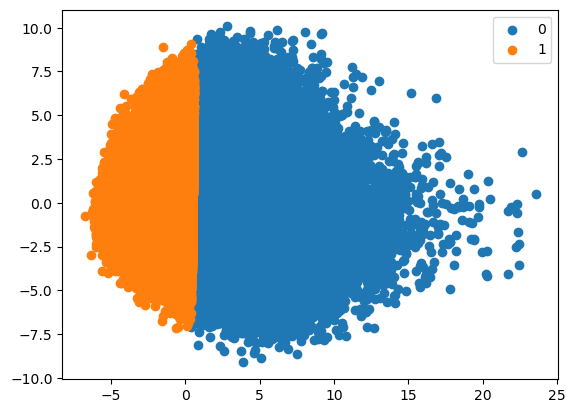

In [5]:
# Run K-Means
km_label = KMeans(n_clusters=2, random_state=0).fit_predict(df_pca.data)

# Get unique labels
kmean_labels = np.unique(km_label)

# Plot the results:
for i in kmean_labels:
    plt.scatter(df_pca[km_label == i , 0], df_pca[km_label == i, 1], label = i)
plt.legend()

plt.show()

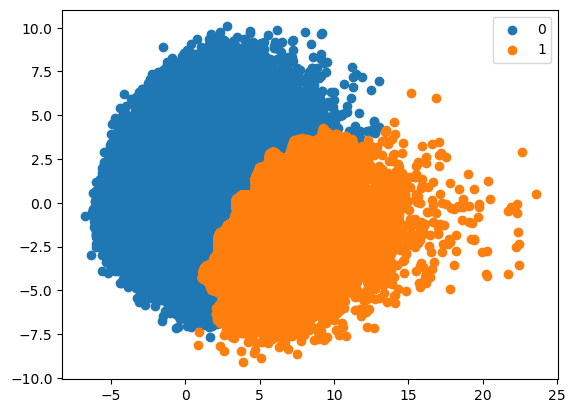

In [6]:
# Run BIRCH (Works with high dimensional data, had to use pca due to memory)
birch_label = Birch(n_clusters=2).fit_predict(df_pca.data)
birch_labels = np.unique(birch_label)

# Plot
for i in birch_labels:
    plt.scatter(df_pca[birch_label == i, 0], df_pca[birch_label == i, 1], label = i)
plt.legend()

plt.show()

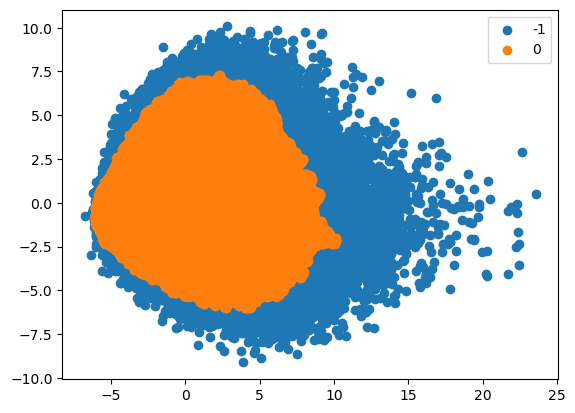

In [7]:
# Run HDBSCAN (Works with high dimensional data)
clusterer = hdbscan.HDBSCAN(min_cluster_size = 200, min_samples=1, allow_single_cluster = True)
clusters = clusterer.fit(df_pca.data)
hdbscan_label = clusterer.labels_

hdbscan_labels = np.unique(hdbscan_label)

for i in hdbscan_labels:
    plt.scatter(df_pca[hdbscan_label == i, 0], df_pca[hdbscan_label == i, 1], label = i)
plt.legend()

plt.show()

In [13]:
# Reset index
df_copy = df_copy.reset_index()
df = df.reset_index()

# Add clustering labels to df_copy
df_copy["kmeans_label"] = list(km_label)
df_copy["birch_label"] = list(birch_label)
df_copy["hdbscan_label"] = list(hdbscan_label)

# Convert labels to int
df_copy["kmeans_label"] = df_copy["kmeans_label"].astype(int)
df_copy["birch_label"] = df_copy["birch_label"].astype(int)
df_copy["hdbscan_label"] = df_copy["hdbscan_label"].astype(int)

# Select columns
df_copy = df_copy[["index", "kmeans_label", "birch_label", "hdbscan_label"]]

# Display
display(df_copy)

,index,kmeans_label,birch_label,hdbscan_label
0,0,0,0,0
1,1,1,0,0
2,2,0,0,0
3,3,1,0,0
4,4,1,0,0
...,...,...,...,...
651425,652141,1,0,0
651426,652142,0,0,0
651427,652143,1,0,0
651428,652144,1,0,0


In [14]:
# Merge with original data frame
df_merged = df_copy.merge(df)

# Check
df_merged.head()

,index,kmeans_label,birch_label,hdbscan_label,subreddit,date,author,id,clean_text,unique_clean_text,...,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63
0,0,0,0,0,ADHD,01/01/2019,DirtJunkie133,abd11x,recently diagnosed need talk others diagnosed ...,recently diagnosed need talk others well im ad...,...,0.299332,0.510428,0.685804,-1.652678,0.128453,-0.037518,-0.252355,0.159227,0.765254,0.069043
1,1,1,0,0,ADHD,01/01/2019,Lin_the_pillow_artis,abd7q9,really annoyed family drunk friend family host...,really annoyed family drunk friend hosting new...,...,0.877196,-0.162841,-0.540606,-0.150722,0.928507,-0.031116,0.335095,-0.006605,-0.937683,-1.389813
2,2,0,0,0,ADHD,01/01/2019,Fleetfeathers,abda0t,medication journey current disappointment wan...,medication journey current disappointment want...,...,0.574246,0.272370,1.032429,-1.337527,0.667623,0.400174,0.831625,0.345661,0.394120,-0.259718
3,3,1,0,0,ADHD,01/01/2019,UnleashedDebs,abdd13,wearable rem sleep detected gaming sleeping hy...,wearable rem sleep detected gaming sleeping hy...,...,1.307342,-1.477269,0.028247,-0.703448,0.413334,-0.083348,-0.643955,-0.406943,0.023596,-0.731947
4,4,1,0,0,ADHD,01/01/2019,liluglee,abdj4w,picking friend carpool nye party texted way dr...,picking friend carpool nye party texted way dr...,...,-0.321208,-0.081452,-0.145260,-0.533126,-0.085388,-0.120506,-0.483124,-0.229370,-0.199331,0.099358


In [15]:
# Select columns and display (can be easily merged back into original dataframe)
check = df_merged[["index", "subreddit", "clean_text", "label", "kmeans_label", "birch_label", "hdbscan_label"]]
display(check)

# Save to csv
check.to_csv("./preproc_data/clustered_BoW_d2v.csv", index=False)

,index,subreddit,clean_text,label,kmeans_label,birch_label,hdbscan_label
0,0,ADHD,recently diagnosed need talk others diagnosed ...,0,0,0,0
1,1,ADHD,really annoyed family drunk friend family host...,0,1,0,0
2,2,ADHD,medication journey current disappointment wan...,0,0,0,0
3,3,ADHD,wearable rem sleep detected gaming sleeping hy...,0,1,0,0
4,4,ADHD,picking friend carpool nye party texted way dr...,0,1,0,0
...,...,...,...,...,...,...,...
651425,652141,sad,sad one talk new year,1,1,0,0
651426,652142,sad,worst new year eve ever depression hit bad las...,0,0,0,0
651427,652143,sad,check sad song,1,1,0,0
651428,652144,sad,zoom wedding tomorrow story let call groom bob...,1,1,0,0


In [16]:
# Basic statistics
print("The number of 1s in label is", len(check[check["label"] == 1].index))
print("The number of 1s in kmeans_label is", len(check[check["kmeans_label"] == 1].index))
print("The number of 1s in birch_label is", len(check[check["birch_label"] == 1].index))
print("The number of 0s in hdbscan_label is", len(check[check["hdbscan_label"] == 0].index))
print("")
print("The number of 0s in label is", len(check[check["label"] == 0].index))
print("The number of 0s in kmeans_label is", len(check[check["kmeans_label"] == 0].index))
print("The number of 0s in birch_label is", len(check[check["birch_label"] == 0].index))
print("The number of -1s in hdbscan_label is", len(check[check["hdbscan_label"] == -1].index))

# Note: it's easier to find basic statistics filtering in Excel (i.e. for when birch and hdscan are the same)

The number of 1s in label is 85428
The number of 1s in kmeans_label is 390740
The number of 1s in birch_label is 82610
The number of 0s in hdbscan_label is 640791

The number of 0s in label is 566002
The number of 0s in kmeans_label is 260690
The number of 0s in birch_label is 568820
The number of -1s in hdbscan_label is 10639
